# Spam Messageby Logistic regression

# Importing libraries and dataset

In [2]:
import matplotlib.pyplot as plt
import numpy as num
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
df = pd.read_csv('spam.csv',encoding='latin-1')
df

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


# Preprocessing

In [3]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [4]:
df.dropna()
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
df.shape

(5572, 5)

In [7]:
df['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [8]:
df['v2'].unique()

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [9]:
df['Unnamed: 2'].unique()

array([nan, ' PO Box 5249',
       ' the person is definitely special for u..... But if the person is so special',
       ' HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE JEN XXX\\""',
       ' wanted to say hi. HI!!!\\" Stop? Send STOP to 62468"',
       'this wont even start........ Datz confidence.."', 'GN',
       '.;-):-D"',
       'just been in bedbut mite go 2 thepub l8tr if uwana mt up?loads a luv Jenxxx.\\""',
       ' bt not his girlfrnd... G o o d n i g h t . . .@"',
       ' I\'ll come up"',
       ' don\'t miss ur best life for anything... Gud nyt..."',
       ' just as a shop has to give a guarantee on what they sell. B. G."',
       ' But at d end my love compromised me for everything:-(\\".. Gud mornin:-)"',
       ' the toughest is acting Happy with all unspoken pain inside..\\""',
       ' smoke hella weed\\""', '\\" not \\"what i need to do.\\""',
       'JUST GOT PAYED2DAY & I HAVBEEN GIVEN Aå£50 PAY RISE 4MY WORK & HAVEBEEN MADE PRESCHOOLCO-ORDINATOR 2I AM FEELINGOOD

In [10]:
df['Unnamed: 3'].unique()

array([nan, ' MK17 92H. 450Ppw 16"', ' why to miss them', 'GE',
       'U NO THECD ISV.IMPORTANT TOME 4 2MORO\\""',
       'i wil tolerat.bcs ur my someone..... But',
       ' ILLSPEAK 2 U2MORO WEN IM NOT ASLEEP...\\""',
       'whoever is the KING\\"!... Gud nyt"', ' TX 4 FONIN HON',
       ' \\"OH No! COMPETITION\\". Who knew', 'IåÕL CALL U\\""'],
      dtype=object)

In [11]:
df['Unnamed: 4'].unique()

array([nan, ' just Keep-in-touch\\" gdeve.."', 'GNT:-)"',
       ' Never comfort me with a lie\\" gud ni8 and sweet dreams"',
       ' CALL 2MWEN IM BK FRMCLOUD 9! J X\\""',
       ' one day these two will become FREINDS FOREVER!"'], dtype=object)

# df

In [14]:
df.head

<bound method NDFrame.head of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  

# Dividing dataset into testing and training

In [15]:
from sklearn.model_selection import train_test_split

X = df['v1']
y = df['v2']

X_train, X_test,y_train, y_test = train_test_split(X,y ,random_state=104,test_size=0.25, shuffle=True)

print('X_train : ')
print(X_train.head())
print('')
print('X_test : ')
print(X_test.head())
print('')
print('y_train : ')
print(y_train.head())
print('')
print('y_test : ')
print(y_test.head())


X_train : 
5330    ham
1013    ham
789     ham
3110    ham
3685    ham
Name: v1, dtype: object

X_test : 
2995     ham
4615     ham
702      ham
1685     ham
226     spam
Name: v1, dtype: object

y_train : 
5330      Dude im no longer a pisces. Im an aquarius now.
1013    Just buy a pizza. Meat lovers or supreme. U ge...
789                          Gud mrng dear hav a nice day
3110                 Short But Cute : \ Be a good person 
3685    I get out of class in bsn in like  &lt;#&gt;  ...
Name: v2, dtype: object

y_test : 
2995    They released vday shirts and when u put it on...
4615                               ÌÏ called dad oredi...
702     What is important is that you prevent dehydrat...
1685                  Cramps stopped. Going back to sleep
226     Will u meet ur dream partner soon? Is ur caree...
Name: v2, dtype: object


# Plotting graph and wordcloud

In [16]:
df = df[['v1', 'v2']]
df.describe()
df['res'] = df.v1.map({'ham':0, 'spam':1})
df = df[['v1', 'v2', 'res']]

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


<Axes: ylabel='res'>

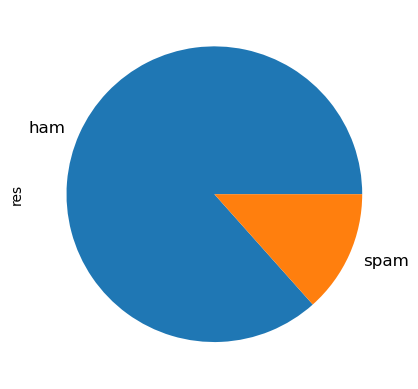

In [18]:
df.groupby(['v1'])['res'].count().plot(kind='pie', fontsize='12')

# Plotting wordclouds

In [21]:
from wordcloud import WordCloud, STOPWORDS

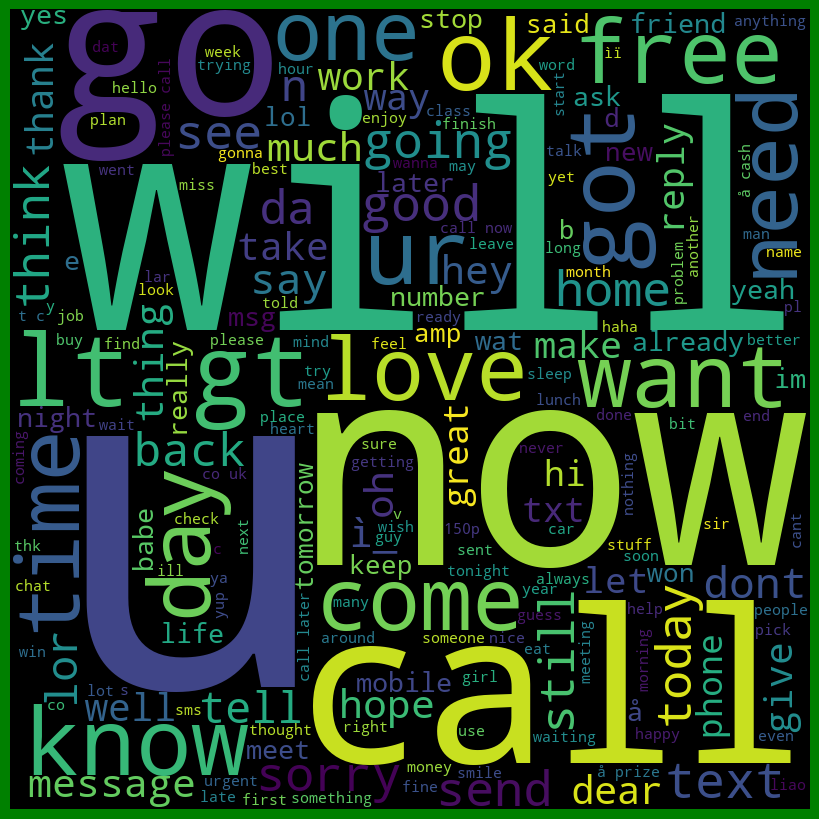

In [27]:
comment_words = ''
stopwords = set(STOPWORDS)

for val in df.v2:

    val = str(val)
    
    tokens = val.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = 'green')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [30]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')

In [32]:
df.head()

,v1,v2,res
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [33]:
df['val'] = df['v1']+' '+df['v2']

In [34]:
print(df['val'])

0       ham Go until jurong point, crazy.. Available o...
1                       ham Ok lar... Joking wif u oni...
2       spam Free entry in 2 a wkly comp to win FA Cup...
3       ham U dun say so early hor... U c already then...
4       ham Nah I don't think he goes to usf, he lives...
                              ...                        
5567    spam This is the 2nd time we have tried 2 cont...
5568            ham Will Ì_ b going to esplanade fr home?
5569    ham Pity, * was in mood for that. So...any oth...
5570    ham The guy did some bitching but I acted like...
5571                       ham Rofl. Its true to its name
Name: val, Length: 5572, dtype: object


In [35]:
A = df.drop(columns='res', axis=1)

In [36]:
B = df['res']
print(A)
print(B)

        v1                                                 v2  \
0      ham  Go until jurong point, crazy.. Available only ...   
1      ham                      Ok lar... Joking wif u oni...   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3      ham  U dun say so early hor... U c already then say...   
4      ham  Nah I don't think he goes to usf, he lives aro...   
...    ...                                                ...   
5567  spam  This is the 2nd time we have tried 2 contact u...   
5568   ham              Will Ì_ b going to esplanade fr home?   
5569   ham  Pity, * was in mood for that. So...any other s...   
5570   ham  The guy did some bitching but I acted like i'd...   
5571   ham                         Rofl. Its true to its name   

                                                    val  
0     ham Go until jurong point, crazy.. Available o...  
1                     ham Ok lar... Joking wif u oni...  
2     spam Free entry in 2 a wkly comp to win

# Stemming to obtain root words

In [37]:
port_stem = PorterStemmer()

def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content
                       if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [38]:
df['val'] = df['val'].apply(stemming)

In [39]:
print(df['val'])

0       ham go jurong point crazi avail bugi n great w...
1                               ham ok lar joke wif u oni
2       spam free entri wkli comp win fa cup final tkt...
3                 ham u dun say earli hor u c alreadi say
4                ham nah think goe usf live around though
                              ...                        
5567    spam nd time tri contact u u pound prize claim...
5568                            ham b go esplanad fr home
5569                                ham piti mood suggest
5570    ham guy bitch act like interest buy someth els...
5571                                   ham rofl true name
Name: val, Length: 5572, dtype: object


In [40]:
one = df['val'].values
two = df['res'].values

In [41]:
print(one)
print(two)

['ham go jurong point crazi avail bugi n great world la e buffet cine got amor wat'
 'ham ok lar joke wif u oni'
 'spam free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli'
 ... 'ham piti mood suggest'
 'ham guy bitch act like interest buy someth els next week gave us free'
 'ham rofl true name']
[0 0 1 ... 0 0 0]


#  Word set

In [42]:
words_set = set()

for doc in  df['val']:
    words = doc.split(' ')
    words_set = words_set.union(set(words))

print('Number of words in the corpus:',len(words_set))
print('The words in the corpus: \n', words_set)

Number of words in the corpus: 6239
The words in the corpus: 
 {'xx', 'lower', 'mindset', 'blank', 'ach', 'less', 'smarter', 'honestli', 'unemploy', 'sariyag', 'rem', 'golf', 'freak', 'window', 'cab', 'potato', 'obl', 'flew', 'truro', 'wear', 'abel', 'syllabu', 'hrishi', 'hectic', 'mph', 'offlin', 'smth', 'mjzgroup', 'ph', 'wocay', 'haventcn', 'perform', 'ke', 'okay', 'hypertens', 'kalainar', 'frequent', 'chick', 'ish', 'studdi', 'fidalf', 'domain', 'hdd', 'seek', 'blur', 'carolina', 'armand', 'incorrect', 'keluviri', 'fri', 'texa', 'beggar', 'harish', 'logoff', 'gal', 'tarpon', 'algorithm', 'fakey', 'among', 'patrick', 'applic', 'slept', 'femal', 'cuddl', 'admin', 'spent', 'oz', 'max', 'embassi', 'korch', 'aeronaut', 'scool', 'librari', 'upload', 'bribe', 'file', 'ra', 'tulsi', 'rupaul', 'opinion', 'ah', 'eek', 'bluray', 'notic', 'film', 'ashley', 'tomeandsaid', 'standard', 'bsnl', 'compliment', 'orchard', 'clearli', 'exact', 'money', 'preview', 'market', 'hon', 'fellow', 'opt', 'gm',

# Term Frequency

In [43]:
doc1_tokens = set(words_set)
count_doc1 = dict.fromkeys(doc1_tokens, 0)
for token in doc1_tokens:
    count_doc1[token] += 1

In [44]:
def calculate_tf(count_doc, doc_tokens):
    tf = dict()
    for token, count in count_doc.items():
        tf[token] = count / float(len(doc_tokens))
    return tf

tf = calculate_tf(count_doc=count_doc1, doc_tokens=doc1_tokens)

print(tf)

{'xx': 0.00016028209648982208, 'lower': 0.00016028209648982208, 'mindset': 0.00016028209648982208, 'blank': 0.00016028209648982208, 'ach': 0.00016028209648982208, 'less': 0.00016028209648982208, 'smarter': 0.00016028209648982208, 'honestli': 0.00016028209648982208, 'unemploy': 0.00016028209648982208, 'sariyag': 0.00016028209648982208, 'rem': 0.00016028209648982208, 'golf': 0.00016028209648982208, 'freak': 0.00016028209648982208, 'window': 0.00016028209648982208, 'cab': 0.00016028209648982208, 'potato': 0.00016028209648982208, 'obl': 0.00016028209648982208, 'flew': 0.00016028209648982208, 'truro': 0.00016028209648982208, 'wear': 0.00016028209648982208, 'abel': 0.00016028209648982208, 'syllabu': 0.00016028209648982208, 'hrishi': 0.00016028209648982208, 'hectic': 0.00016028209648982208, 'mph': 0.00016028209648982208, 'offlin': 0.00016028209648982208, 'smth': 0.00016028209648982208, 'mjzgroup': 0.00016028209648982208, 'ph': 0.00016028209648982208, 'wocay': 0.00016028209648982208, 'haventcn

In [45]:
import math

def calculate_idf(doc_counts):
    idf = dict.fromkeys(doc_counts[0].keys(), 0)
    for doc in doc_counts:
        for token, count in doc.items():
            if count!=0:
                idf[token] += 1

    for token, count in idf.items():
        idf[token] = math.log(len(doc_counts) / float(count))

    return idf

idf = calculate_idf([count_doc1])
print(idf)

{'xx': 0.0, 'lower': 0.0, 'mindset': 0.0, 'blank': 0.0, 'ach': 0.0, 'less': 0.0, 'smarter': 0.0, 'honestli': 0.0, 'unemploy': 0.0, 'sariyag': 0.0, 'rem': 0.0, 'golf': 0.0, 'freak': 0.0, 'window': 0.0, 'cab': 0.0, 'potato': 0.0, 'obl': 0.0, 'flew': 0.0, 'truro': 0.0, 'wear': 0.0, 'abel': 0.0, 'syllabu': 0.0, 'hrishi': 0.0, 'hectic': 0.0, 'mph': 0.0, 'offlin': 0.0, 'smth': 0.0, 'mjzgroup': 0.0, 'ph': 0.0, 'wocay': 0.0, 'haventcn': 0.0, 'perform': 0.0, 'ke': 0.0, 'okay': 0.0, 'hypertens': 0.0, 'kalainar': 0.0, 'frequent': 0.0, 'chick': 0.0, 'ish': 0.0, 'studdi': 0.0, 'fidalf': 0.0, 'domain': 0.0, 'hdd': 0.0, 'seek': 0.0, 'blur': 0.0, 'carolina': 0.0, 'armand': 0.0, 'incorrect': 0.0, 'keluviri': 0.0, 'fri': 0.0, 'texa': 0.0, 'beggar': 0.0, 'harish': 0.0, 'logoff': 0.0, 'gal': 0.0, 'tarpon': 0.0, 'algorithm': 0.0, 'fakey': 0.0, 'among': 0.0, 'patrick': 0.0, 'applic': 0.0, 'slept': 0.0, 'femal': 0.0, 'cuddl': 0.0, 'admin': 0.0, 'spent': 0.0, 'oz': 0.0, 'max': 0.0, 'embassi': 0.0, 'korch': 0.

# Calculating tf * idf

In [46]:
def calculate_tfidf(tf, idf):
    tfidf = dict()
    for token, count in tf.items():
        tfidf[token] = count * idf[token]
    return tfidf

tfidf = calculate_tfidf(tf, idf)

tfidf_df = pd.DataFrame([tfidf])
tfidf_df

,xx,lower,mindset,blank,ach,less,smarter,honestli,unemploy,sariyag,...,pataistha,pie,spark,idp,hmv,morrowxxxx,jersey,oooh,sportsx,callcost
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Applying Logistic Regression model 

In [47]:
from sklearn.preprocessing import LabelEncoder

cols = ['v1','v2']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
df.head()

,v1,v2,res,val
0,0,1079,0,ham go jurong point crazi avail bugi n great w...
1,0,3101,0,ham ok lar joke wif u oni
2,1,1000,1,spam free entri wkli comp win fa cup final tkt...
3,0,4088,0,ham u dun say earli hor u c alreadi say
4,0,2757,0,ham nah think goe usf live around though


In [48]:
from sklearn.linear_model import LogisticRegression
X=df.iloc[:, 0].values
y=df.iloc[:, 1].values

regressor=LogisticRegression()
X=X.reshape(-1,1)
regressor.fit(X,y)

LogisticRegression()

In [50]:
from sklearn.model_selection import train_test_split

X = df[['v1']]

y = df['v2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
...

logreg = LogisticRegression(random_state=16)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [51]:
print(y_pred)

[3666 3666  944 ... 3666 3666  944]


# Accuracy, Confusion matrix and F1 score.

In [52]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [53]:
predictions=logreg.predict(X_test)

In [54]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

accuracy_score(y_pred,predictions)

1.0

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         1
          43       0.00      0.00      0.00         1
          47       0.00      0.00      0.00         1
          53       0.00      0.00      0.00         1
          58       0.00      0.00      0.00         1
          59       0.00      0.00      0.00         1
          61       0.00    

c:\Users\tarus\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tarus\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tarus\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tarus\anaconda3\envs\

# The accuracy of this model is 1.0 and all parameters have been accounted for.